Import Libraries

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #The nature of the data set is binary ('Yes' or 'No') so decision trees from RandomForestClassifier need to be used
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


Read data file

In [81]:
df = pd.read_csv('income.csv')

Hot encoding

In [82]:
df = pd.concat([df.drop('occupation',axis=1),pd.get_dummies(df.occupation).add_prefix('occuption_')], axis=1) #Using pandas organise the occupation feature
df = pd.concat([df.drop('workclass',axis=1),pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education',axis=1) #No need to one hot encode education
df = pd.concat([df.drop('marital-status',axis=1),pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship',axis=1),pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race',axis=1),pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country',axis=1),pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

Gender encoding

In [83]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

Filtering income correlation

In [84]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop =int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)


Correlation heatmap

<Axes: >

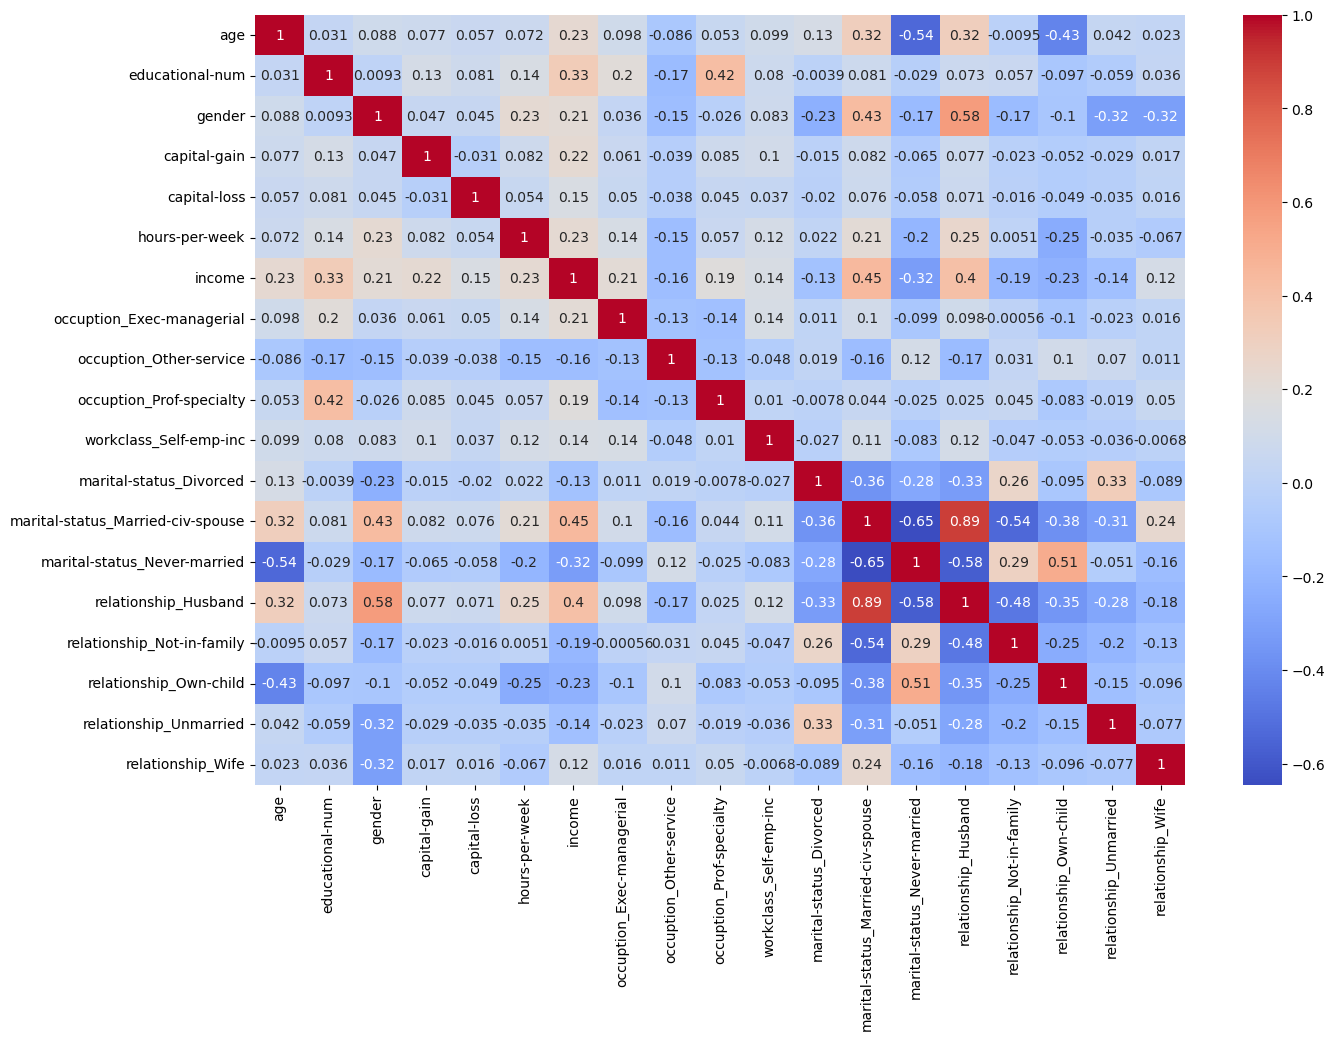

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

Training

In [86]:
df = df.drop('fnlwgt',axis=1)
train_df, test_df = train_test_split(df,test_size=0.2) #20% of the data is used for testing

train_X = train_df.drop('income', axis=1)
train_Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_Y = test_df['income']

forest = RandomForestClassifier()
forest.fit(train_X, train_Y)
forest.score(test_X, test_Y) #View performance

Sorting feature importances 

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances #View most important features


{'age': 0.22716914630261661,
 'educational-num': 0.12615371425135743,
 'hours-per-week': 0.11478864232406565,
 'capital-gain': 0.11056872533279762,
 'marital-status_Married-civ-spouse': 0.06745031637583541,
 'relationship_Husband': 0.05647169634881777,
 'capital-loss': 0.03932880933705512,
 'marital-status_Never-married': 0.027934214215282024,
 'occuption_Exec-managerial': 0.019840365424865992,
 'occuption_Prof-specialty': 0.018388027457171482,
 'gender': 0.0128326581050236,
 'relationship_Not-in-family': 0.01063347128745152,
 'workclass_Private': 0.009161699266012981,
 'relationship_Own-child': 0.008334771372068096,
 'workclass_Self-emp-not-inc': 0.008154277038700744,
 'occuption_Other-service': 0.007971712151599905,
 'relationship_Wife': 0.007517925355472342,
 'native-country_United-States': 0.006230833213966787,
 'occuption_Sales': 0.006144855263543206,
 'race_White': 0.006096052946501803,
 'occuption_Craft-repair': 0.00596427597254947,
 'marital-status_Divorced': 0.0059605176276280

Hyper parameter tuning 

In [ ]:
param_grid = {
    'n_estimators':[50,100,250],
    'max_depth':[5,10,30,None],
    'min_samples_split':[2,4],
    'max_features':['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,verbose=10)

grid_search.fit(train_X, train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.3s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.825 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

Best estimator setting

In [ ]:
grid_search.best_estimator_ #Best estimator setting
forest = grid_search.best_estimator_
forest.score(test_X,test_Y)
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances #View most important features

{'age': 0.1489382141438291,
 'capital-gain': 0.13417252274036998,
 'educational-num': 0.13269953294763778,
 'marital-status_Married-civ-spouse': 0.09270538216045415,
 'hours-per-week': 0.09181406135221973,
 'relationship_Husband': 0.05749806896780445,
 'capital-loss': 0.04407227790343151,
 'marital-status_Never-married': 0.03469559655327217,
 'occuption_Exec-managerial': 0.024308642564625827,
 'occuption_Prof-specialty': 0.021465632296160855,
 'relationship_Not-in-family': 0.01507115641117447,
 'gender': 0.01482991965781003,
 'relationship_Own-child': 0.013565163483657565,
 'relationship_Wife': 0.010354910598687338,
 'occuption_Other-service': 0.00980348974584171,
 'workclass_Private': 0.008694995284557668,
 'workclass_Self-emp-not-inc': 0.008554667808339444,
 'marital-status_Divorced': 0.008032745600803493,
 'workclass_Self-emp-inc': 0.007627679606407797,
 'relationship_Unmarried': 0.007231961468691839,
 'race_White': 0.006122760467338505,
 'occuption_Sales': 0.00608989697830354,
 'na